# Достижение цели увеличения выручки

Вы пришли в команду I Love Supersport. https://ilovesupersport.com
Ключевой продукт в ILSS это офлайн тренировки. По опросу пользователей при выборе школы они ориентируются на следующие факторы: Расположение локации тренировки, Тренер, Расписание, Отзывы.
Цель на 20% увеличить выручку.

Распишите по шагам ваше предложение по достижению цели и сделайте просчет в таблице. За счёт каких факторов и продуктов вы планируете достичь цель?


## Создаём наглядную таблицу
 
 - school_type - тип школы
 - tariff - стоимость услуги
 - groups - количество групп на данный момент
 - people_for_group - количество людей в группе (берём за основу максимальное)
 - revenue_now - выручка сейчас
 - percent - 20% от настоящей выручки
 - future_revenue - желаемая выручка (+20%)

In [80]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [21]:
data = pd.DataFrame({'school_type': ['школа бега', 'runpass'], 'tariff': [10800, 9100], 'groups': [10, 20], 'people_for_group': [20, 20]})
data['revenue_now'] = data['groups']*data['people_for_group']*data['tariff']
data['percent'] = data['revenue_now']*0.2
data['future_revenue'] = data['revenue_now']+ data['percent']
data

,school_type,tariff,groups,people_for_group,revenue_now,percent,future_revenue
0,школа бега,10800,10,20,2160000,432000.0,2592000.0
1,runpass,9100,20,20,3640000,728000.0,4368000.0


In [40]:
print('Желаемый прирост прибыли:', data['percent'].sum())

Желаемый прирост прибыли: 1160000.0


По опросу пользователей при выборе школы они ориентируются на следующие факторы: 
- Расположение локации тренировки
- Тренер
- Расписание
- Отзывы

## Способы увеличения выручки

Одними из самых эффективных способов являются
- cross-sell - методика перекрёстных продаж
- up-sell - методика, направленная на поднятие суммы

Рассмотрим каждый из них на нашем примере


##  Up-sell

1. Расположение локации

   Всего имеется 7 варинатов локаций:
- «Олимпийский центр братьев Знаменских», м. Сокольники
- Парк «Красная Пресня», м. Выставочная, м. Улица 1905 года
- Парк «Таганский», м. Марксистская, м. Крестьянская застава
- Парк Ходынское поле, м. ЦСКА
- Северный спортивный центр «Лужники», м. Спортивная
- Южный спортивный центр «Лужники», м. Воробьёвы горы
- Парк Дружбы, м. Речной вокзал

Среди них стоит выделить две локации в Лужниках, парк "Таганский" и парк "Красная Пресня".
Лужники являются центром притяжения внушительного количества людей, которые неравнодушны к спорту: в этой локации вся инфраструктура направлена на комфорт людей, занимающихся тем или иным видом активности. 
Две последние упомянутые локации удобно расположены (кольцо/одна станция от кольца), что делает их максимально доступными для большинства клиентов. 

Из вышесказанного можно сделать вывод, что небольшое поднятие цен в локациях, представляющих бОльший комфорт для людей, не скажется на уменьшении спроса и даст прирост в выручке. 
Стоит отметить, что данное изменение имеет смысл внести для новопришедших, а на уже постоянных клиентах лучше использовать методику cross-sell

Предположим, что в Лужниках и парках мы поднимаем цену:

Лужники -  11300 и 9600
Парки - 11000 и 9300

В ближайшее время мы набираем 2 группы (на разные тарифы) по 10 человек в Лужниках, и по 2 группы (10 человек) в каждом парке (runpass).


In [36]:
data_luz = pd.DataFrame({'school_type': ['школа бега', 'runpass'], 'tariff': [11300, 9600], 'groups': [2, 2], 'people_for_group': [10, 10]})
data_luz['revenue'] = data_luz['tariff']*data_luz['people_for_group']
data_luz

,school_type,tariff,groups,people_for_group,revenue
0,школа бега,11300,2,10,113000
1,runpass,9600,2,10,96000


In [38]:
data_park = pd.DataFrame({'school_type': [ 'runpass'], 'tariff': [9300], 'groups': [4], 'people_for_group': [10]})
data_park['revenue'] = data_park['tariff']*data_park['people_for_group']*4
data_park

,school_type,tariff,groups,people_for_group,revenue
0,runpass,9300,4,10,372000


In [41]:
print('Дополнительный прирост:', data_luz['revenue'].sum()+data_park['revenue'])

Дополнительный прирост: 0    581000
Name: revenue, dtype: int64


Также было бы возможно на небольшой процент поднять цену услуг у более сертифицированных тренеров  и у тренеров с более хорошими отзывами, но на мой взгляд, более экологичным и клиентоориентированным способом было бы сделать тренировки у данных профессионалов преимущественно в тех локациях, в которых изначально мы подняли цены, чтобы мотивация у клиента прийти именно в это место была выше. По сайту я заметила, что по большей части распределение тренеров по локациям уже придерживается именно такого принципа.



Помимо этого можно сделать абонементы на 3/6 месяцев, которые были бы более выгодны клиентам при единоразовой оплате, но в моменте компании приносили бы больше прибыли, так как всегда есть жизненные факторы, которые могут повлиять на посещаемость: плохое самочувтсвие, отъезд (командировка, отпуск), внезапные планы. 
Рассмотрим пример на абонементе на 3 месяца.

Вспомним расценки за месяц:

In [62]:
data

,school_type,tariff,groups,people_for_group,revenue_now,percent,future_revenue
0,школа бега,10800,10,20,2160000,432000.0,2592000.0
1,runpass,9100,20,20,3640000,728000.0,4368000.0


Сумма за 3 месяца тренировок:

In [65]:
data_a = pd.DataFrame({'school_type': ['школа бега', 'runpass'], 'tariff': [10800, 9100]})
data_a['3'] = data['tariff']*3
data_a

,school_type,tariff,3
0,школа бега,10800,32400
1,runpass,9100,27300


В специальном предложении обозначим цену в 29500 и 24500 соотвественно 

Выгода для покупателя - 2900 и 2800 соответственно
Это может привлечь клиентов и дать им мотивацию приобретать сразу абонемент. 
Если предположить, что в среднем покупатели абонемента будут посещать 80% тренировок, а от общей цены без скидки 20% составляют 25920 и 21840, то в плюс получаем 3580 и 2660.

Предположим, что 10 человек приобрели абонемент школы бега и 10 человек - абонемент runpass.
Выгода составляет приблизительно 35800 и 26600, что в сумме даёт 62400.


## Cross-sell

Данную методику возможно применить как на новых пользователях, так и на уже активных

1. Активные пользователи:

    В разгар сезона можно напомнить клиентам на очных тренировках/в режиме рассылок/ push-уведомлениями о наличии возможности прийти на индивидуальное занятие, которое сможет более детально определить цель и сориентировать в подготовке, подходящей конкретному человеку. 
    Это может касаться также не только бега, но и плавания. Можно напомнить, что плавание - тоже кардио, но без ударной нагрузки, что даст возможность сердцу поработать, а ногам восстановиться. А грамотный подход и правильная техника плавания улучшат результат, в чём может помочь индивидуальная тренировка. 
    Стоимость занятия - 3000 рублей. На данный момент мы имеем 600 пользователей. Если хотя бы 20% заинтересуются таким предложением и посетят 1 индивидуальную тренировку, то мы получим +360000 (120 пользователей*3000)
    
    
2. Новые пользователи:

   При регистрации и оформлении можно напомнить клинетам о возможности пройти индивидуальный онлайн-скрининг для бегунов. Если 50 человек воспользуются этой опцией, то мы получим +49500 (50*990) 
   
   
   
И активным, и новым пользователям можно напомнить о возможности поехать на беговой кэмп в Кисловодск или Приэльбрусье, что станет отличной возможностью выйти на новый уровень, найти близких по духу людей и тренироваться под руководством высококлассных тренеров. Отталкиваемся от 600 настоящих пользователей (и +100 новых). Если 20 человек зарегистрируются на кэмп, то мы получим +518000 (20*25900)

Также рассмотрим варианты, в которых предположить конкретную выручку без вводных данных будет довольно сложно, но идеи могут быть полезны в реализации и прироста прибыли:

1. Тренировка с именитым/известным спортсменом
2. Мастер-класс по тейпированию/самомассажу
3. Встреча/лекция с нутрициологом (советы по питанию)

Данные опции могут привлечь новых клиентов, если помимо анонса на сайте/в приложении сделать таргетированную рекламу. А уже активным пользователям можно предложить небольшую скидку (в районе 10%), что увеличит их лояльность.

## Суммирование и подведение итогов

Объединяем результаты

Рассмотрим, какую прибыль принёс каждый из способов

In [71]:
method = pd.DataFrame({'method': ['location', 'subscription', 'training', 'screening', 'camp'], 'earning': [581000, 62400, 360000, 49500, 518000]})
method

,method,earning
0,location,581000
1,subscription,62400
2,training,360000
3,screening,49500
4,camp,518000


Рассмторим, какой стала прибыль после внедрения вышеперечисленных пунктов

In [89]:
growing = pd.DataFrame({'time': ['before', 'after'], 'earn': [6960000, 8530900]})
growing

,time,earn
0,before,6960000
1,after,8530900


<AxesSubplot:>

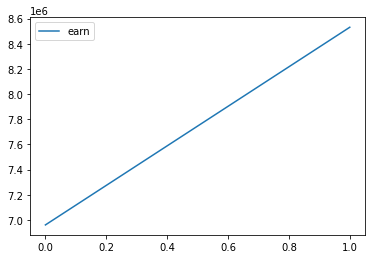

In [90]:
growing
growing.plot()

In [72]:
print('Общий прирост предполагаемой выручки:', method['earning'].sum())

Общий прирост предполагаемой выручки: 1570900


Вышеперечисленными способами возможно увеличить выручку на 22,5%

## Общий вывод

Отталикаваясь от предоставленных данных, мы попробовали рассчитать возможные варианты увеличения выручки, среди которых:

1. Увеличение цен в локациях, пользующихся наибольшим спросом
2. Создание абонементов на более продолжительный срок
3. Предложение индивидуальных тренировок по бегу/плаванию
4. Предложение онлайн-скрининга
5. Предложение бегового кэмпа

6*. Дополнительные тренировки/мастер-классы/лекции с приглашёнными людьми

В результате расчётов мы получили предполагаемый прирост выручки на 22,5% без учёта последнего пункта

(Все расчёты сделаны предположительными и приблизительными)